In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
import seaborn as sns

In [32]:
df = pd.read_csv("archive (7)/Reviews.csv")

In [33]:
df.sample(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
182682,182683,B000W5SLEU,A2F6CVR0M82NEY,"Matthew Paul ""Shark""",0,0,5,1303948800,Orijen 6 Fish w/ Sea Veg.,Orijen is truly amazing!It was like giving my ...
321584,321585,B001J8H1E0,A3A5HIK0HSPJJ1,Fuz1223,0,0,5,1347148800,Plato organic chicken,"Great product, great price and what's most imp..."


In [34]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [35]:
df["Text"].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [36]:
print(df.shape)

(568454, 10)


#### Quick EDA

In [37]:
dic1 = dict(df["Score"].value_counts())

Text(0.5, 1.0, 'Reviews by people')

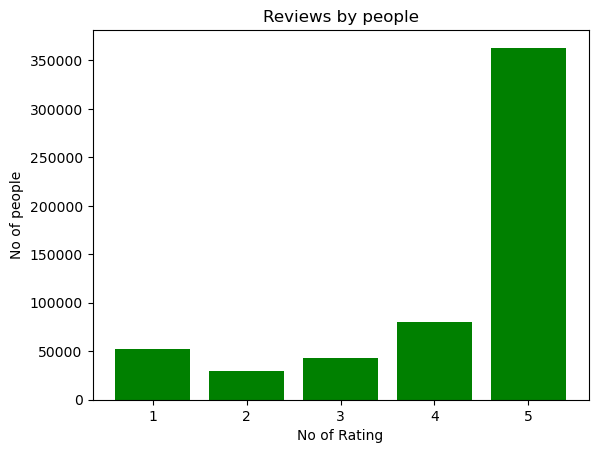

In [38]:

plt.bar(dic1.keys(), dic1.values(), color = "g")

plt.xlabel("No of Rating")
plt.ylabel("No of people")
plt.title("Reviews by people")

## BASIC NLTK


In [39]:
example = df["Text"].values[10]
example

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [40]:
token = nltk.word_tokenize(example)

In [41]:
token[:12]

['I',
 'do',
 "n't",
 'know',
 'if',
 'it',
 "'s",
 'the',
 'cactus',
 'or',
 'the',
 'tequila']

In [42]:
tagged_words = nltk.pos_tag(token)

In [43]:
tagged_words[:10]

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC')]

In [44]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/vansh/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [45]:
nltk.download('words')

[nltk_data] Downloading package words to /Users/vansh/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [46]:
ent = nltk.chunk.ne_chunk(tagged_words)
ent.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


# VADER sentiment scoring


In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [48]:
sia = SentimentIntensityAnalyzer()

In [49]:
sia.polarity_scores("")

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [50]:
sia.polarity_scores(example)

{'neg': 0.016, 'neu': 0.833, 'pos': 0.151, 'compound': 0.9809}

In [51]:
d = {}
for i , row in tqdm(df.iterrows()):
    text = row["Text"]
    myid = row["Id"]
    d[myid] = sia.polarity_scores(text)

    

0it [00:00, ?it/s]

In [52]:
vaders = pd.DataFrame(d).T
vaders = vaders.reset_index().rename(columns = {"index":'Id'})
vaders = vaders.merge(df, how = 'left')

In [53]:
vaders[:4]

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.711,0.289,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.085,0.771,0.144,0.8138,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,0.932,0.068,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


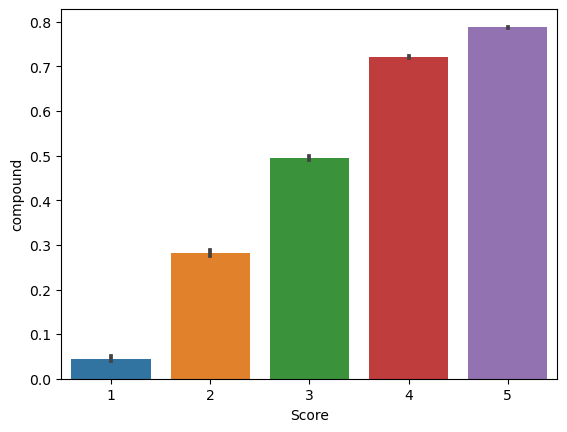

In [54]:
ax = sns.barplot(data = vaders, x= 'Score', y = 'compound')

Text(0.5, 1.0, 'NEgative')

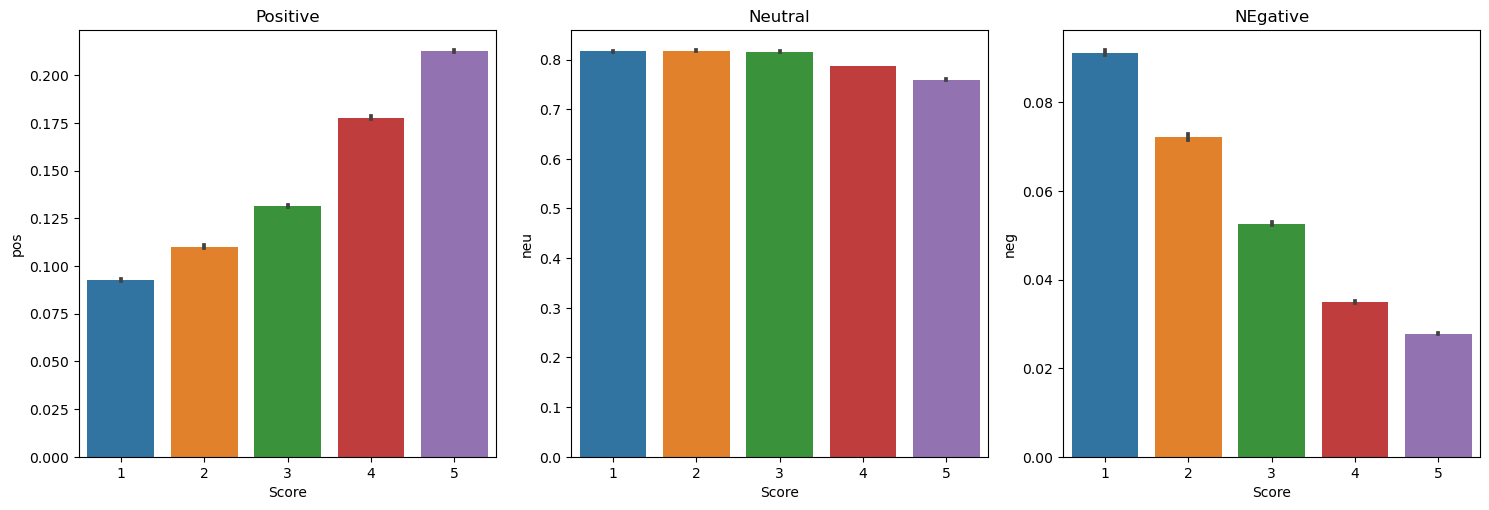

In [69]:
fig , axs = plt.subplots(1,3 , figsize= (15,5))
sns.barplot(data = vaders, x= 'Score', y = 'pos',ax = axs[0])
sns.barplot(data = vaders, x= 'Score', y = 'neu',ax = axs[1])
sns.barplot(data = vaders, x= 'Score', y = 'neg',ax = axs[2])

plt.tight_layout()
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("NEgative")

### Roberta pretrained model

In [70]:
from transformers import AutoTokenizer

In [72]:
from transformers import AutoModelForSequenceClassification


In [73]:
from scipy.special import softmax

In [75]:
model= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

In [77]:
encoded_text = tokenizer(example, return_tensors = "pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dic = {
    "roberta_neg": scores[0],
    "roberta_neu": scores[1],
    "roberta_pos": scores[2]
}

In [78]:
print(scores_dic)

{'roberta_neg': 0.019134074, 'roberta_neu': 0.07104434, 'roberta_pos': 0.9098216}


In [79]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = "pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dic = {
        "roberta_neg": scores[0],
        "roberta_neu": scores[1],
        "roberta_pos": scores[2]
    }
    
    return scores_dic


In [95]:
res = {}

for i , row in tqdm(df.iterrows()):
    try: 
        text = row["Text"]
        myid = row["Id"]

        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename , **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"runtime errror occured {myid}")

0it [00:00, ?it/s]

runtime errror occured 83
runtime errror occured 187
runtime errror occured 529
runtime errror occured 540
runtime errror occured 746
runtime errror occured 863
runtime errror occured 1053
runtime errror occured 1070
runtime errror occured 1156
runtime errror occured 1321
runtime errror occured 1375
runtime errror occured 1498
runtime errror occured 1575
runtime errror occured 1796
runtime errror occured 1826
runtime errror occured 2169
runtime errror occured 2248
runtime errror occured 2476
runtime errror occured 2492
runtime errror occured 2584
runtime errror occured 2610
runtime errror occured 2897
runtime errror occured 2898
runtime errror occured 2902
runtime errror occured 2928
runtime errror occured 2942
runtime errror occured 2944
runtime errror occured 2947
runtime errror occured 2948
runtime errror occured 3022
runtime errror occured 3023
runtime errror occured 3025
runtime errror occured 3306
runtime errror occured 3788
runtime errror occured 3969
runtime errror occured 4107

IndexError: index out of range in self

In [96]:
both

{'vader_neg': 0.01,
 'vader_neu': 0.753,
 'vader_pos': 0.237,
 'vader_compound': 0.9889,
 'roberta_neg': 0.00190014,
 'roberta_neu': 0.008368501,
 'roberta_pos': 0.9897314}

In [97]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [98]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

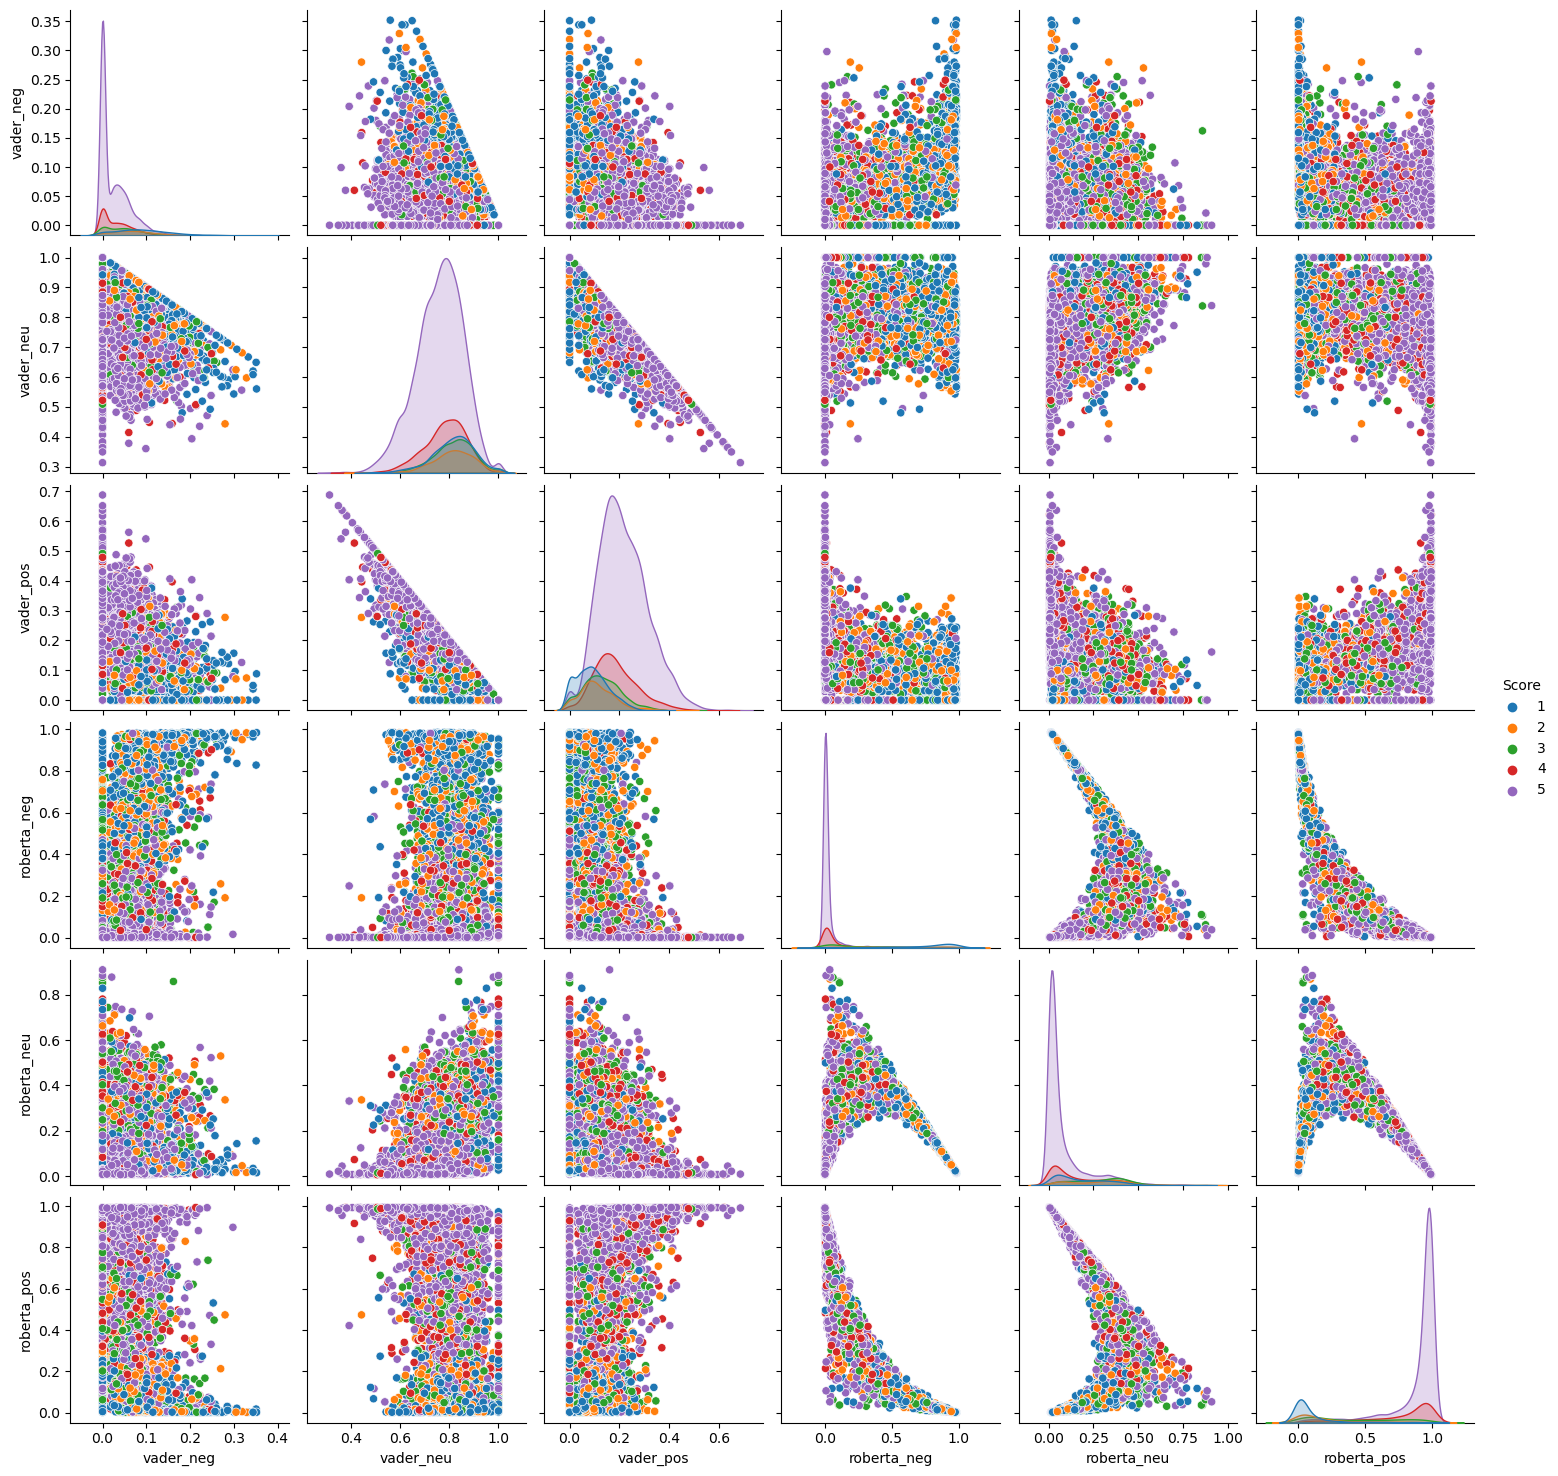

In [99]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [100]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [101]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]


'THEY ARE DELICIOUS NOT SALTY YOU CAN SIT AND EAT 2-3 2 OUNCE BAGS AT A TIME I GIVE THESE 5 STARS PLUS I HAVE TO STOP MYSELF FROM EATING THEM THEY ARE DELICIOUS.'

In [103]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [104]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]